In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Balanced Dataset

### 1. Loading the data

In [2]:
#read the data
path = "../input/predicting-churn-for-bank-customers/Churn_Modelling.csv"
df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#drop columsn not needed for prediction
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2.EDA

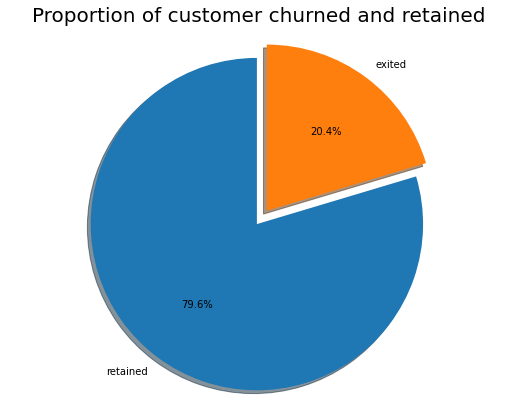

In [6]:
#plotting a pie chart
retained, exited = df["Exited"].value_counts()[0], df["Exited"].value_counts()[1]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie([retained, exited], explode=explode, labels=["retained", "exited"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

From above pie chart,we can see that around 20% of customers had churned i.e exited and 80% retained.This shows that our dataset is a little imbalanced so we have to predict customer churn with a good accuracy as this 20% customers are of more interest to the bank

#### Feature EDA plots

Text(0.5, 1.0, 'Countplot-Geography Column')

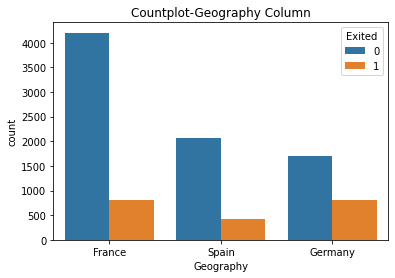

In [7]:
#geography
sns.countplot(x='Geography', hue = 'Exited', data = df)
plt.title("Countplot-Geography Column")

Text(0.5, 1.0, 'Countplot-Gender Column')

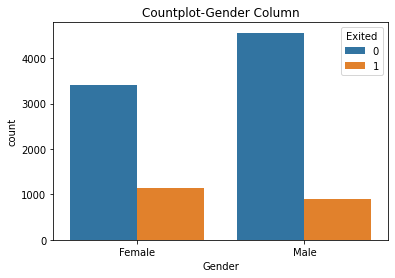

In [8]:
#gender
sns.countplot(x='Gender', hue = 'Exited', data = df)
plt.title("Countplot-Gender Column")

Text(0.5, 1.0, 'Countplot-HasCrCard Column')

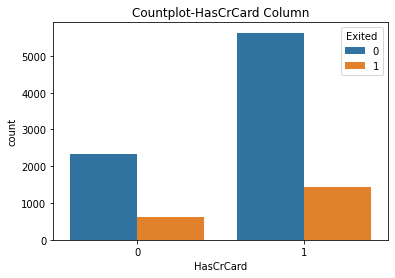

In [9]:
#HasCrCard
sns.countplot(x='HasCrCard', hue = 'Exited', data = df)
plt.title("Countplot-HasCrCard Column")

Text(0.5, 1.0, 'Countplot-IsActiveMember Column')

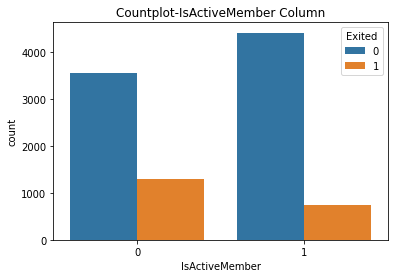

In [10]:
#IsActiveMember
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df)
plt.title("Countplot-IsActiveMember Column")

From the above countplots we can infer that-  
1.Total umber of customers who retained is highest from France and those who exited are highest from Germany,which means the bank needs to focus more on customers from Germany followed by France so that they don't churn.  
2. The proportion of female customers churning is greater than that of male customers.  
3. Suprisingly,coustomers who had credit card churned more which can be a coincidence.  
4. As usual,the inactive members churned more.  

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

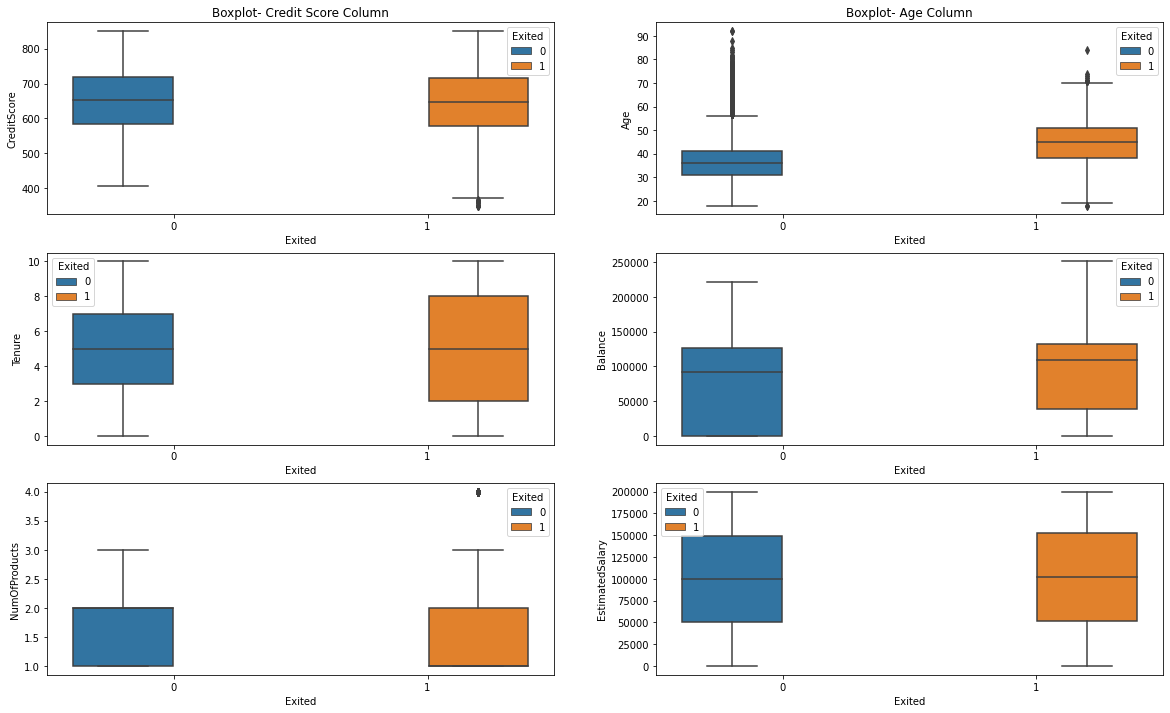

In [11]:
# Relations based on the continuous data attributes
fig, axes = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axes[0][0]).set_title('Boxplot- Credit Score Column')
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axes[0][1]).set_title('Boxplot- Age Column')
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axes[1][0])#.set_title('Boxplot- Tenure Column')
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axes[1][1])#.set_title('Boxplot- Balance Column')
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axes[2][0])#.set_title('Boxplot- NumProducts Column')
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axes[2][1])#.set_title('Boxplot- EstimatedSalary Column')

From the above boxplots we can infer that-  
-- There is no significant difference in Credit score,estimated salary and number of products they possess between customers who churned and who don't.  
-- The older customers are churning more than the young ones which indicates that the bank need to focus on older customers more.  
-- Customers with tenure period with bank either too less or too more tends to churn more.   
-- Customers who churned generally have more bank balance which is a bad indications as it will lead to capital deficiency in the bank.  

### 3. Feature Engineering

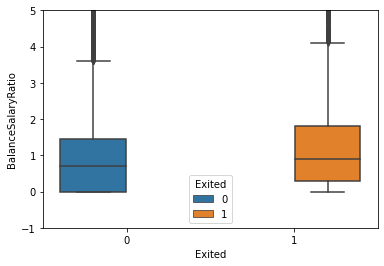

In [12]:
# 1st Attribute - Balance Salary Ratio
df["BalanceSalaryRatio"] = df["Balance"]/df["EstimatedSalary"]
sns.boxplot(y = "BalanceSalaryRatio", x = "Exited", hue = "Exited", data=df)
plt.ylim(-1, 5)
plt.show()

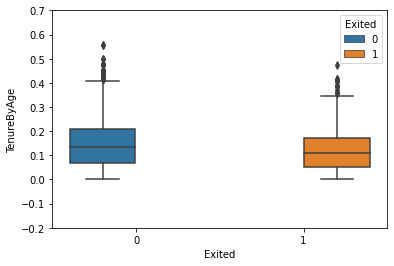

In [13]:
#  2nd Attribute-Tenure By Age
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-0.2, 0.7)
plt.show()

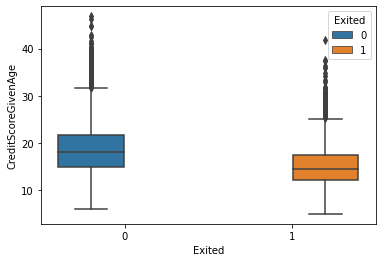

In [14]:
# 3rd Attribute- Credit Score Given Age
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = df)
plt.show()

In [15]:
df.shape

(10000, 14)

### 4. Data Preparation for the Model fitting

In [16]:
# Arranging columns by data type for easier manipulation

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
categorical_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
label = ["Exited"]

#### Correlation Matrix for continuous attributes

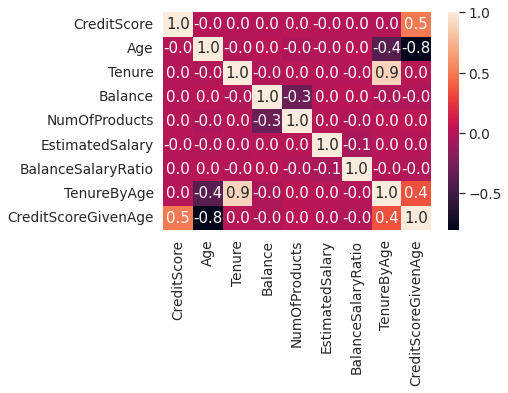

In [17]:
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(df[continuous_vars].corr(), annot = True,fmt = ".1f")
plt.show()

##### Almost all of the columns aren't related with other columns except the features we have generated.

### Dealing with categorical features

In [18]:
# Changing values of column HasCrCard and IsActiveMember from 0 to -1 so that they will influence negatively to the model instead of no effect.
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1

In [19]:
print("Unique categories in column Gender", df["Gender"].nunique())
print("Unique categories in column Geography", df["Geography"].nunique())

Unique categories in column Gender 2
Unique categories in column Geography 3


In [20]:
from sklearn.preprocessing import LabelEncoder 

le1 = LabelEncoder() 
le2 = LabelEncoder() 

df['Gender']= le1.fit_transform(df['Gender']) 
df['Geography']= le2.fit_transform(df['Geography']) 


#Get the mappings: Ascending order
print("Mappings for Gender is:", le1.classes_)
print("Mappings for Geography is:", le2.classes_)

Mappings for Gender is: ['Female' 'Male']
Mappings for Geography is: ['France' 'Germany' 'Spain']


In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,2,0,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,14.829268
2,502,0,0,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,11.952381
3,699,0,0,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,17.923077
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [22]:
df1 = pd.get_dummies(data=df, columns=['Gender','Geography'])
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'BalanceSalaryRatio',
       'TenureByAge', 'CreditScoreGivenAge', 'Gender_0', 'Gender_1',
       'Geography_0', 'Geography_1', 'Geography_2'],
      dtype='object')

In [23]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1,0,1,0,0
1,608,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,14.829268,1,0,0,0,1
2,502,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,11.952381,1,0,1,0,0
3,699,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,17.923077,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,1,0,0,0,1


#### Scaling the continuous attributes using MinMaxScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[continuous_vars] = scaler.fit_transform(df1[continuous_vars])

In [25]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.085714,0.235083,1,0,1,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0,0.000070,0.043902,0.237252,1,0,0,0,1
2,0.304,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1,0.000132,0.342857,0.168807,1,0,1,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,0,0.000000,0.046154,0.310859,1,0,1,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.000150,0.083721,0.354739,1,0,0,0,1


#### 5.Model fitting and selection

In [26]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [27]:
#Get the features and the labels: Stratified sampling is preferred here
X = df1.drop('Exited',axis='columns')
y = df1['Exited']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=5)

In [28]:
#Get the distribution of labels in y_train
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [29]:
#Get the distribution of labels in y_test
y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

### Figuring out the importance of features in our dataset

In [30]:
features_label = X_train.columns
forest = RandomForestClassifier (n_estimators = 1000, random_state = 0, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.162967
 2) Age                            0.129716
 3) Tenure                         0.118392
 4) Balance                        0.094615
 5) NumOfProducts                  0.094175
 6) HasCrCard                      0.089472
 7) IsActiveMember                 0.077986
 8) EstimatedSalary                0.072941
 9) BalanceSalaryRatio             0.044951
10) TenureByAge                    0.040128
11) CreditScoreGivenAge            0.020095
12) Gender_0                       0.014145
13) Gender_1                       0.010323
14) Geography_0                    0.010272
15) Geography_1                    0.010212
16) Geography_2                    0.009610


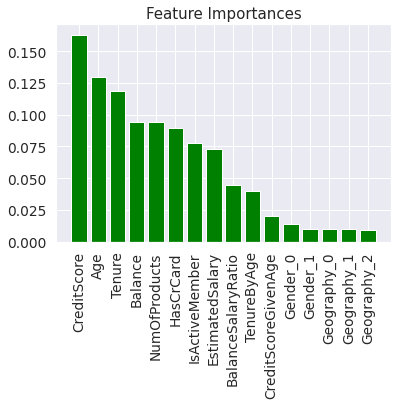

In [31]:
# Visualization of the Feature importances
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color = "green", align = "center")
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90)
plt.show()

### Grid Search for the best model & model parameters

In [32]:
### getting the best suited parameters from the dataset
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)


def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

#### 1: Primal Logistic Regression

In [33]:
# ####1: Primal logistic regression

# # Fit primal logistic regression
# param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
#               'penalty':['l2'], 'tol':[0.0001,0.00001,0.000001]}
# log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
# log_primal_Grid.fit(X_train, y_train)
# best_model(log_primal_Grid)

In [34]:
# Fitting the best primal logistic regression
log_primal = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=250, tol=1e-05)

#### 2: Poly Logistic regression

In [35]:
# ####2:  Fit logistic regression with pol 2 kernel
# param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
#               'tol':[0.0001,0.000001]}
# poly2 = PolynomialFeatures(degree=2)
# X_train_pol2 = poly2.fit_transform(X_train)
# log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
# log_pol2_Grid.fit(X_train_pol2,y_train)
# best_model(log_pol2_Grid)

In [36]:
# Fitting the best model basis CV

poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(X_train)
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,y_train)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

#### 3: SVM w/ RBF Kernel

In [37]:
# # Fit SVM with RBF Kernel
# param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
# SVM_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=0)
# SVM_grid.fit(X_train, y_train)
# best_model(SVM_grid)

In [38]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(X_train,y_train)

SVC(C=100, gamma=0.1, probability=True)

### 4: SVM w/ Pol Kernel

In [39]:
# # Fit SVM with pol kernel
# param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
# SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
# SVM_grid.fit(X_train, y_train)
# best_model(SVM_grid)

In [40]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(X_train,y_train)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

### 5. RF

In [41]:
# # Fit random forest classifier
# param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
# RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, refit=True, verbose=0)
# RanFor_grid.fit(X_train, y_train)
# best_model(RanFor_grid)

In [42]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=7, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=3)

### 6. XGBoost

In [43]:
# # Fit Extreme Gradient boosting classifier
# param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
# xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=3, refit=True, verbose=0)
# xgb_grid.fit(X_train, y_train)
# best_model(xgb_grid)

In [44]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=5,
                    min_child_weight=1, n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None,  subsample=1, use_label_encoder =False)
XGB.fit(X_train,y_train)

[15:24:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [45]:
#Getting the best model among these classifers

print("Normal logistic regression", classification_report(y_train, log_primal.predict(X_train)))
print("2Poly kernel logistic regression", classification_report(y_train,  log_pol2.predict(df_train_pol2)))
print("SVM RBF Kernel", classification_report(y_train,  SVM_RBF.predict(X_train)))
print("SVM with polynomial kernel" ,classification_report(y_train,  SVM_POL.predict(X_train)))
print("Random Forest Classifier", classification_report(y_train,  RF.predict(X_train)))
print("XG Boost", classification_report(y_train,  XGB.predict(X_train)))

Normal logistic regression               precision    recall  f1-score   support

           0       0.83      0.97      0.89      6370
           1       0.65      0.22      0.33      1630

    accuracy                           0.82      8000
   macro avg       0.74      0.59      0.61      8000
weighted avg       0.79      0.82      0.78      8000

2Poly kernel logistic regression               precision    recall  f1-score   support

           0       0.87      0.97      0.92      6370
           1       0.78      0.45      0.57      1630

    accuracy                           0.86      8000
   macro avg       0.83      0.71      0.75      8000
weighted avg       0.85      0.86      0.85      8000

SVM RBF Kernel               precision    recall  f1-score   support

           0       0.86      0.98      0.92      6370
           1       0.83      0.40      0.54      1630

    accuracy                           0.86      8000
   macro avg       0.85      0.69      0.73      8000

##### As can be seen from the metrics above, XGBoost Classifier works the best for our case. Thus, a better strategy would be to further improvise on the output of XGBoost

In [46]:
#Test Data performance

print("Normal logistic regression", classification_report(y_test, log_primal.predict(X_test)))
print("2Poly kernel logistic regression", classification_report(y_test,  log_pol2.predict(poly2.fit_transform(X_test))))
print("SVM RBF Kernel", classification_report(y_test,  SVM_RBF.predict(X_test)))
print("SVM with polynomial kernel" ,classification_report(y_test,  SVM_POL.predict(X_test)))
print("Random Forest Classifier", classification_report(y_test,  RF.predict(X_test)))
print("XG Boost", classification_report(y_test,  XGB.predict(X_test)))

Normal logistic regression               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1593
           1       0.65      0.23      0.34       407

    accuracy                           0.82      2000
   macro avg       0.74      0.60      0.62      2000
weighted avg       0.80      0.82      0.78      2000

2Poly kernel logistic regression               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.76      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

SVM RBF Kernel               precision    recall  f1-score   support

           0       0.86      0.98      0.91      1593
           1       0.80      0.38      0.51       407

    accuracy                           0.85      2000
   macro avg       0.83      0.68      0.71      2000

## Part2: Balancing the dataset

#### Removing the imbalance of our dataset by SMOTE oversampling technique

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [48]:
#Now, that we have same number of datalabels in category X and y

X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [49]:
y_trainS.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [51]:
#Grid_CV on the balanced data for XGBoost

# param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
# xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False), param_grid, cv=3, refit=True, verbose=0)
# xgb_grid.fit(X_train, y_train)
# best_model(xgb_grid)

In [52]:
#Refitting the XGB classifier

XGB2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.2, max_delta_step=0,max_depth=7,
                    min_child_weight=1, n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None,  subsample=1, use_label_encoder=False)
XGB2.fit(X_trainS,y_trainS)

[15:24:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [53]:
#get the classification report for the training dataset

print(classification_report(y_train,  XGB2.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6370
           1       0.88      0.76      0.82      1630

    accuracy                           0.93      8000
   macro avg       0.91      0.87      0.89      8000
weighted avg       0.93      0.93      0.93      8000



In [54]:
#get the classification report for the training dataset

print(classification_report(y_testS,  XGB2.predict(X_testS)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.93      0.88      0.90      1593

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



#### Precision and Recall values on the original test_data

In [55]:
#getting the classification report for test dataset

print(classification_report(y_test,  XGB2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1593
           1       0.88      0.79      0.84       407

    accuracy                           0.94      2000
   macro avg       0.92      0.88      0.90      2000
weighted avg       0.94      0.94      0.94      2000



In [56]:
### Dumping model weights for pickl file

# import joblib 

# XBG_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.2, max_delta_step=0,max_depth=7,
#                     min_child_weight=1, missing=None, n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
#                     reg_lambda=1, scale_pos_weight=1, seed=None,  subsample=1)


# Save the model as a pickle in a file 
# joblib.dump(XBG_classifier, 'XGB_smote_churnclassifier.pkl') 
  
# Load the model from the file 
# XGB_churn_classify = joblib.load('XGB_smote_churnclassifier.pkl')  
  
# Use the loaded model to make predictions 
# XGB_from_joblib.predict(X_test) 